# Pandas

## What is Pandas?
A Python library providing data structures and data analysis tools.

Think of it like Excel for Python.


## Benefits

* Efficient storage and processing of data.
* Includes many built in functions for data transformation, aggregations, and plotting.
* Great for exploratory work.

## Not so greats

* Does not scale terribly well to large datasets.

## Documentation:

* http://pandas.pydata.org/pandas-docs/stable/index.html

In [1]:
#By convention import pandas like:
import pandas as pd

#By convention import numpy like:
import numpy as np


#Make sure you have both lines when using matplotlib in Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline


#For fake data.
from numpy.random import randn

# Pandas 
* They are built on top of NumPy NdArrays
* http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

## Objectives

* Create `Series` and `DataFrame`s from Python data types. 
* Create `DataFrame`s from on disk data.
* Index and Slice `pandas` objects.
* Aggregate data in `DataFrame`s.
* Join multiple `DataFrame`s.

# Pandas is built on Numpy
* Numpy is one of the fundamental packages for scientific computing in Python.


## Numpy Arrays
* Or NdArrays (n-dimensional array)
* They are like lists in Python however they allow faster computation
    1. They are stored as one contiguous block of memory, rather than being spread out across multiple locations like a list. 
    2. Each item in a numpy array is of the same data type (i.e. all integers, all floats, etc.), rather than a conglomerate of any number of data types (as a list is). We call this idea homogeneity, as opposed to the possible heterogeneity of Python lists.


Just how much faster are they? Let's take the numbers from 0 to 1 million, and sum those numbers, timing it with both a list and a numpy array.


In [2]:
numpy_array = np.arange(0, 1000000)
python_list = range(1000000)

print ("python list")
time = %timeit -r 1 -o sum(python_list)
print (time.all_runs[0]/time.loops )

print ("\n" + "numpy array")
time = %timeit -r 1 -o np.sum(numpy_array)
print (time.all_runs[0]/time.loops)

print ("\n" + "numpy array -- standard library sum")
time = %timeit -r 1 -o sum(numpy_array)
print (time.all_runs[0]/time.loops)

python list
28 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
0.028019320796011014

numpy array
613 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
0.0006133281530346722

numpy array -- standard library sum
119 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
0.11902074000099674


# Numpy NdArrays

* have types
* Each array is of one type

In [3]:
ints = np.array(range(3))
chars = np.array(list('ABC'))
strings = np.array(['A','BC',"DEF", 'GHIJ'])

print (ints.dtype, chars.dtype, strings.dtype)

int64 <U1 <U4


# Creating and using NdArrays

In [4]:
my_lst_ndarray = np.array([1, 2, 3, 4, 5])
my_tuple_ndarray = np.array((1, 2, 3, 4, 5), np.int32) 

In [5]:
print(my_lst_ndarray.dtype)
print(my_tuple_ndarray.dtype)

int64
int32


In [6]:
print(my_lst_ndarray.shape)
print(my_tuple_ndarray.shape)

(5,)
(5,)


# Multi D

In [7]:
nd_arr = np.array([[1, 2, 3, 4, 5],[6, 7, 8, 9, 10],[11, 12, 13, 14, 15]])
nd_arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

# Access info in the array
* Individual data
* Slices of data

In [8]:
nd_arr[1,1]

7

In [9]:
nd_arr[0:2,0:2]

array([[1, 2],
       [6, 7]])

In [10]:
nd_arr.shape

(3, 5)

In [11]:
nd_arr.sum()

120

In [12]:
nd_arr.sum(axis=1)

array([15, 40, 65])

In [13]:
nd_arr.max()

15

# Broadcasting

In [14]:
a = np.array([[10], [-10]]) 
b = np.array([[1, 2], [-1, -2]]) 

print (a)
print ('\n')
print (b)
print ('\n')
print (a.shape, b.shape )
print ("\n")
print (a + b)

# elements will "duplicate, expand, and fill up" 
# to make the dimensions compatible for element-wise operations
# cool.

[[ 10]
 [-10]]


[[ 1  2]
 [-1 -2]]


(2, 1) (2, 2)


[[ 11  12]
 [-11 -12]]


In [15]:
a = np.array([[10, 0, -10, 0],[-10, 0, -10, 0]]) 
b = np.array([[2,2],[-1,0]]) 

print (a)
print ('\n')
print (b)
print ('\n')
print (a.shape, b.shape )
print ("")
print (a + b)



[[ 10   0 -10   0]
 [-10   0 -10   0]]


[[ 2  2]
 [-1  0]]


(2, 4) (2, 2)



ValueError: operands could not be broadcast together with shapes (2,4) (2,2) 

In [ ]:
# it's not clear how it should fill up in this case... so it can't/doesn't

----------------------------------------------------

# Pandas 


## Pandas Series
* are (one dimensional) np.ndarray vectors **with an index**
* They are built upon NdArrays

In [16]:
series = pd.Series([5775,373,7,42,np.nan,33])
print (series)
print ("\n")
print (series.shape)

0    5775.0
1     373.0
2       7.0
3      42.0
4       NaN
5      33.0
dtype: float64


(6,)


In [17]:
world_series = pd.Series(["cubs","royals","giants","sox","giants","cards","giants","...",None])
world_series

0      cubs
1    royals
2    giants
3       sox
4    giants
5     cards
6    giants
7       ...
8      None
dtype: object

## Pandas Series are very powerful when dealing with dates

In [18]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

2015-01-31    0.530590
2015-02-28    0.248133
2015-03-31    0.925848
2015-04-30   -0.229234
2015-05-31   -0.877059
2015-06-30    0.124700
2015-07-31   -0.243675
2015-08-31    1.035333
2015-09-30    0.754070
2015-10-31    0.698460
Freq: M, dtype: float64

# Indexes.
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [19]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print (indexed_series)
print ('\n')
print (alt_indexed_series)

California    0.534891
Alabama      -0.260850
Indiana       0.228090
Montana       0.337411
Kentucky     -0.807358
dtype: float64


Washington   -0.263925
Alabama      -0.551744
Montana       1.365350
Indiana      -2.415709
New York     -1.255663
dtype: float64


In [20]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

Alabama      -0.812594
California         NaN
Indiana      -2.187619
Kentucky           NaN
Montana       1.702761
New York           NaN
Washington         NaN
dtype: float64

# Pandas DataFrames
* are a set of Pandas Series **that share the same index** 

Think Excel spreadsheets!!!

In [21]:
pd.DataFrame(
    [[1, 2, 3], [4, 5, 6]], 
    columns=['a', 'b', 'c'], 
    index=['foo', 'bar'])

,a,b,c
foo,1,2,3
bar,4,5,6


In [22]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

,a,b,c,d,e
2015-01-31,0.867070,1.206716,1.536593,2.031746,0.385182
2015-02-28,-1.172010,2.217549,-0.829807,-1.870521,-1.479668
2015-03-31,2.359511,-1.873987,1.315770,0.524512,-0.436723
2015-04-30,0.835846,-0.236355,-0.143190,1.037899,-1.809780
2015-05-31,0.028537,-0.578766,0.154365,0.282986,-1.246852
2015-06-30,0.480969,0.142600,-0.406855,-2.212096,2.823154
2015-07-31,-0.987689,0.755920,-0.770595,-0.042358,-0.253342
2015-08-31,1.440464,1.686847,-0.503573,-0.190239,-0.215718
2015-09-30,1.006607,-0.304705,-0.636229,-1.795402,0.905842
2015-10-31,0.048159,0.983554,0.165620,0.177685,-1.698628


In [23]:
#A dataframes columns are series:
col = df.a
type(col)

pandas.core.series.Series

In [24]:
#So are the rows.
row = df.loc['2015-01-31']
type(row)

pandas.core.series.Series

In [25]:
#The columns all have the same index:
col.index   

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [26]:
#What's the index for the rows?
row.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

# Pandas DataFrame basics

In [27]:
# Slicing/access of data

# When one row is returned it is a Series (note a dataframe) 
print (type(df.a))
df.a  # sometimes works

<class 'pandas.core.series.Series'>


2015-01-31    0.867070
2015-02-28   -1.172010
2015-03-31    2.359511
2015-04-30    0.835846
2015-05-31    0.028537
2015-06-30    0.480969
2015-07-31   -0.987689
2015-08-31    1.440464
2015-09-30    1.006607
2015-10-31    0.048159
Freq: M, Name: a, dtype: float64

In [28]:
df['a'] #works always

2015-01-31    0.867070
2015-02-28   -1.172010
2015-03-31    2.359511
2015-04-30    0.835846
2015-05-31    0.028537
2015-06-30    0.480969
2015-07-31   -0.987689
2015-08-31    1.440464
2015-09-30    1.006607
2015-10-31    0.048159
Freq: M, Name: a, dtype: float64

In [29]:
#Return subset / multiple columns 
df[['a','b']]

,a,b
2015-01-31,0.867070,1.206716
2015-02-28,-1.172010,2.217549
2015-03-31,2.359511,-1.873987
2015-04-30,0.835846,-0.236355
2015-05-31,0.028537,-0.578766
2015-06-30,0.480969,0.142600
2015-07-31,-0.987689,0.755920
2015-08-31,1.440464,1.686847
2015-09-30,1.006607,-0.304705
2015-10-31,0.048159,0.983554


# Advanced sleection
## .loc / .iloc / .ix

In [30]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

,c,d,e
2015-05-31,0.154365,0.282986,-1.246852
2015-06-30,-0.406855,-2.212096,2.823154
2015-07-31,-0.770595,-0.042358,-0.253342
2015-08-31,-0.503573,-0.190239,-0.215718


In [31]:
df.iloc[2:-3,2:5] #Ranges by number.

,c,d,e
2015-03-31,1.315770,0.524512,-0.436723
2015-04-30,-0.143190,1.037899,-1.809780
2015-05-31,0.154365,0.282986,-1.246852
2015-06-30,-0.406855,-2.212096,2.823154
2015-07-31,-0.770595,-0.042358,-0.253342


In [32]:
df.ix[2:-3,2:5] #Tries to estimate your request

/Users/natalie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,c,d,e
2015-03-31,1.315770,0.524512,-0.436723
2015-04-30,-0.143190,1.037899,-1.809780
2015-05-31,0.154365,0.282986,-1.246852
2015-06-30,-0.406855,-2.212096,2.823154
2015-07-31,-0.770595,-0.042358,-0.253342


In [33]:
df.ix['2015-05-31':'2015-08-31', 'c':'e']

,c,d,e
2015-05-31,0.154365,0.282986,-1.246852
2015-06-30,-0.406855,-2.212096,2.823154
2015-07-31,-0.770595,-0.042358,-0.253342
2015-08-31,-0.503573,-0.190239,-0.215718


# DO NOT USE .ix 
It is here as you may see it in other code and should know what it is
  
  
--------------------------------------------------------------------------------------------     
        
      
      
# DataFrame Indexing

In [34]:
#Multi Index:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)
df

,0,1,2,3,4
2015-01-31,0.909940,0.227759,0.143498,-0.229572,0.648305
2015-02-28,-1.612672,-1.427890,0.162409,0.289043,0.547810
2015-03-31,-1.400171,-0.785320,-2.851504,-0.602345,1.306218
2015-04-30,-0.210474,0.850314,0.294881,1.741656,-1.169617
2015-05-31,-0.177282,-0.225011,-0.395373,1.602062,0.432424
2015-06-30,-0.474784,0.043090,0.121425,-1.687925,-0.568426
2015-07-31,0.132691,-0.311852,0.382953,-0.143905,0.508976
2015-08-31,-0.801470,0.832289,1.195194,-0.399320,-0.732262
2015-09-30,-1.066026,1.441419,1.655396,-0.127936,1.408591
2015-10-31,0.602271,-0.751811,0.711416,-0.756301,-2.514817


In [35]:
# Adding new column
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

,0,1,2,3,4,state
2015-01-31,0.909940,0.227759,0.143498,-0.229572,0.648305,Alabama
2015-02-28,-1.612672,-1.427890,0.162409,0.289043,0.547810,Alaska
2015-03-31,-1.400171,-0.785320,-2.851504,-0.602345,1.306218,Arizona
2015-04-30,-0.210474,0.850314,0.294881,1.741656,-1.169617,Alabama
2015-05-31,-0.177282,-0.225011,-0.395373,1.602062,0.432424,Alaska


In [36]:
df = df.reset_index()
df = df.set_index(['state', 'index'])
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,0.909940,0.227759,0.143498,-0.229572,0.648305
Alaska,2015-02-28,-1.612672,-1.427890,0.162409,0.289043,0.547810
Arizona,2015-03-31,-1.400171,-0.785320,-2.851504,-0.602345,1.306218
Alabama,2015-04-30,-0.210474,0.850314,0.294881,1.741656,-1.169617
Alaska,2015-05-31,-0.177282,-0.225011,-0.395373,1.602062,0.432424


In [37]:
df.loc['Alabama'].head()

,0,1,2,3,4
index,,,,,
2015-01-31,0.909940,0.227759,0.143498,-0.229572,0.648305
2015-04-30,-0.210474,0.850314,0.294881,1.741656,-1.169617
2015-07-31,0.132691,-0.311852,0.382953,-0.143905,0.508976
2015-10-31,0.602271,-0.751811,0.711416,-0.756301,-2.514817
2016-01-31,0.886123,-0.013910,-1.401886,0.461970,1.914192


In [38]:
df.loc['2015-01-31'] #Doesn't work.

KeyError: 'the label [2015-01-31] is not in the [index]'

In [39]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

0    0.909940
1    0.227759
2    0.143498
3   -0.229572
4    0.648305
Name: (Alabama, 2015-01-31 00:00:00), dtype: float64

# Load Data from file for use

In [40]:
df = pd.read_csv('data/winequality-red.csv', delimiter=';')

In [41]:
df.head()  #Display the first x rows (default is 5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
df.shape

(1599, 12)

In [43]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [45]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [46]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Filtering (i.e., row selecting or boolean indexing)

In [47]:
trueFalse= df['chlorides'] <= 0.08 
trueFalse

0        True
1       False
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10      False
11       True
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20       True
21      False
22      False
23      False
24      False
25       True
26       True
27      False
28       True
29      False
        ...  
1569     True
1570    False
1571     True
1572     True
1573     True
1574     True
1575     True
1576    False
1577     True
1578    False
1579     True
1580     True
1581     True
1582     True
1583     True
1584     True
1585     True
1586     True
1587     True
1588     True
1589     True
1590     True
1591    False
1592     True
1593     True
1594    False
1595     True
1596     True
1597     True
1598     True
Name: chlorides, Length: 1599, dtype: bool

In [48]:
df[trueFalse]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6


In [49]:
# To use a mask, we actually have to use it to index into the DataFrame (using square brackets). 
df[df['chlorides'] <= 0.08]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6


In [50]:
# Okay, this is cool. What if I wanted a slightly more complicated query...
df[(df['chlorides'] >= 0.04) & (df['chlorides'] < 0.08)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6


In [51]:
df.groupby('quality') # Note that this returns back to us a groupby object. It doesn't actually 
                      # return to us anything useful until we perform some aggregation on it. 

In [52]:
# Note we can also group by multilple columns by passing them in in a list. It will group by 
# the first column passed in first, and then the second after that (i.e. it will group by 
# the second within the group by of the first). 
df2 = df.groupby(['pH', 'quality']).count()['chlorides']

df2

pH    quality
2.74  4          1
2.86  6          1
2.87  6          1
2.88  5          1
      8          1
2.89  5          2
      6          2
2.90  6          1
2.92  5          3
      7          1
2.93  5          1
      6          2
2.94  5          2
      6          2
2.95  7          1
2.98  5          2
      6          1
      7          1
      8          1
2.99  5          2
3.00  5          4
      6          2
3.01  5          1
      6          1
      7          3
3.02  5          3
      6          1
      7          4
3.03  5          4
      6          2
                ..
3.61  5          3
      6          5
3.62  4          1
      5          2
      6          1
3.63  3          1
      5          2
3.66  4          1
      5          2
      6          1
3.67  5          2
      6          1
3.68  5          2
      6          2
      7          1
3.69  5          2
      6          2
3.70  6          1
3.71  6          1
      7          3
3.72  5          

# Adding / Remove columns

In [53]:
# add a computed column

df['pct_free_sulf'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

In [54]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pct_free_sulf
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.323529
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.373134
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.277778
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.283333
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.323529
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0.325000
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0.254237
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7,0.714286
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7,0.500000
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0.166667


In [ ]:
# Dropping a row

In [55]:
df.drop('pct_free_sulf')

ValueError: labels ['pct_free_sulf'] not contained in axis

In [56]:
df.drop('pct_free_sulf', axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [57]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'pct_free_sulf'],
      dtype='object')

# Managing Missing Values
* http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [58]:
miss_val_df = pd.DataFrame(
    [[1, 2, 3], [4, np.nan, 6]], 
    columns=['a', 'b', 'c'], 
    index=['foo', 'bar'])
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,NaN,6


In [59]:
miss_val_df.fillna(0)

,a,b,c
foo,1,2.0,3
bar,4,0.0,6


In [60]:
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,NaN,6


In [61]:
# IF YOU WANT THE CHANGE TO HAPPEN INPLACE YOU MUST add that
miss_val_df.fillna(0,inplace=True)
miss_val_df

,a,b,c
foo,1,2.0,3
bar,4,0.0,6


In [62]:
## DROP ROW

In [63]:
miss_val_df['b']['foo'] =np.nan

/Users/natalie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [64]:
miss_val_df

,a,b,c
foo,1,NaN,3
bar,4,0.0,6


In [65]:
miss_val_df.dropna()

,a,b,c
bar,4,0.0,6


# Merge 
* http://pandas.pydata.org/pandas-docs/stable/merging.html

We can join DataFrames in a similar way that we join tables to SQL.  In fact, left, right, outer, and inner joins work the same way here.

In [66]:
merge1 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['a', 'b', 'c'])

merge2 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['z', 'b', 'y'])

merge1

,a,b,c
0,1,2,3
1,4,3,6


In [67]:
merged_df = merge1.merge(merge2, how='inner')

In [68]:
merged_df

,a,b,c,z,y
0,1,2,3,1,3
1,4,3,6,4,6


# Concatenating
* adding *rows*
* see also: df.append()

In [69]:
df1 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col3': range(5)})
df2 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col4': range(5)},
    index=range(5, 10))

In [70]:
df1

,Col1,Col2,Col3
0,0,0,0
1,1,1,1
2,2,2,2
3,3,3,3
4,4,4,4


In [71]:
df2

,Col1,Col2,Col4
5,0,0,0
6,1,1,1
7,2,2,2
8,3,3,3
9,4,4,4


In [72]:
#Vertically
pd.concat([df1, df2], axis=0)

,Col1,Col2,Col3,Col4
0,0,0,0.0,NaN
1,1,1,1.0,NaN
2,2,2,2.0,NaN
3,3,3,3.0,NaN
4,4,4,4.0,NaN
5,0,0,NaN,0.0
6,1,1,NaN,1.0
7,2,2,NaN,2.0
8,3,3,NaN,3.0
9,4,4,NaN,4.0


In [73]:
pd.concat([df1, df2], join='outer', axis=1)

,Col1,Col2,Col3,Col1,Col2,Col4
0,0.0,0.0,0.0,NaN,NaN,NaN
1,1.0,1.0,1.0,NaN,NaN,NaN
2,2.0,2.0,2.0,NaN,NaN,NaN
3,3.0,3.0,3.0,NaN,NaN,NaN
4,4.0,4.0,4.0,NaN,NaN,NaN
5,NaN,NaN,NaN,0.0,0.0,0.0
6,NaN,NaN,NaN,1.0,1.0,1.0
7,NaN,NaN,NaN,2.0,2.0,2.0
8,NaN,NaN,NaN,3.0,3.0,3.0
9,NaN,NaN,NaN,4.0,4.0,4.0


# Graphing DataFrames

In [74]:
df = pd.read_csv('data/playgolf.csv', delimiter=',' )
df.head()

,Date,Outlook,Temperature,Humidity,Windy,Result
0,7/1/14,sunny,85,85,False,Don't Play
1,7/2/14,sunny,80,90,True,Don't Play
2,7/3/14,overcast,83,78,False,Play
3,7/4/14,rain,70,96,False,Play
4,7/5/14,rain,68,80,False,Play


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f925320>,
      dtype=object)

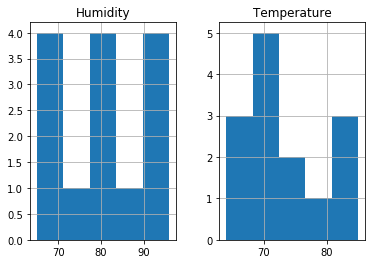

In [75]:
df.hist(['Temperature','Humidity'],bins=5)

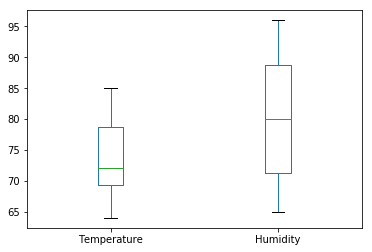

In [81]:
df[['Temperature','Humidity']].plot(kind='box')

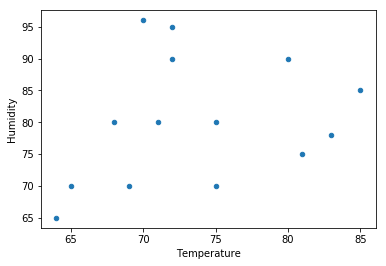

In [82]:
df.plot('Temperature', 'Humidity', kind='scatter')

In [83]:
groups=df.groupby('Outlook')
for name, group in groups:
    print( name)

overcast
rain
sunny


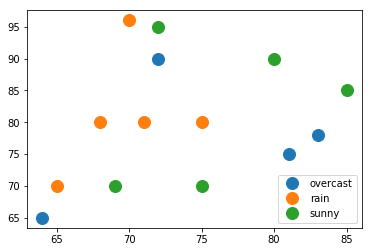

In [84]:
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()

In [80]:
df['Outlook'].value_counts()

sunny       5
rain        5
overcast    4
Name: Outlook, dtype: int64